In [1]:
import pickle
from tabulate import tabulate
import os
from utils import data_validation
from modelUtils.vae_utils import train_val_vae
from models.vae_models import VAE, create_vae_encoder, create_vae_decoder
from vis_utils import visualize_latent_space, plot_latent_dimensions
import matplotlib.pyplot as plt

# Prepare headers for the table
model_headers = ['Latent Dimensions', 'Hidden Dimensions', 'Activation', 'Dropout Rate', 'Beta']
headers = ['Latent Dimensionality', 'Total Loss', 'Reconstruction Loss', 'KL Loss']
table_data = []
model_table_data = []
table_data_recon = []
model_table_data_recon = []

In [2]:
with open('../outputs/CrossVal/cv_latent_15.pkl', 'rb') as file:
    cv_15 = pickle.load(file)

with open('../outputs/CrossVal/cv_latent_20.pkl', 'rb') as file:
    cv_20 = pickle.load(file)

with open('../outputs/CrossVal/cv_latent_25.pkl', 'rb') as file:
    cv_25 = pickle.load(file)

with open('../outputs/CrossVal/cv_latent_30.pkl', 'rb') as file:
    cv_30 = pickle.load(file)

In [3]:
best_models_total = []
best_models_recon = []
labels = ['15', '20', '25', '30']
for cv_res in [cv_15, cv_20, cv_25, cv_30]:
    best_model_total = None
    best_model_recon = None
    for model in cv_res:
        (struct, res) = model
        if best_model_total is None:
            best_model_total = model
        elif res['total_loss'] < best_model_total[1]['total_loss']:
            best_model_total = model
        if best_model_recon is None:
            best_model_recon = model
        elif res['recon_loss'] < best_model_recon[1]['recon_loss']:
            best_model_recon = model

    best_models_total.append(best_model_total)
    # After finding the best model, extract the needed information
    latent_dim = best_model_total[0]['encoder']['latent_dim']
    total_loss = best_model_total[1]['total_loss']
    reconstruction_loss = best_model_total[1]['recon_loss']
    kl_loss = best_model_total[1]['kl_loss']

    hidden_dim = best_model_total[0]['encoder']['hidden_dim']
    activation = best_model_total[0]['encoder']['activation']
    dropout_rate = best_model_total[0]['encoder']['dropout_rate']
    beta = best_model_total[0]['vae']['beta']

    # Append the information to the table data
    model_table_data.append([latent_dim, hidden_dim, activation, dropout_rate, beta])
    # Append the information to the table data
    table_data.append([latent_dim, total_loss, reconstruction_loss, kl_loss])

    best_models_recon.append(best_model_recon)

    # After finding the best model, extract the needed information
    latent_dim = best_model_recon[0]['encoder']['latent_dim']
    total_loss = best_model_recon[1]['total_loss']
    reconstruction_loss = best_model_recon[1]['recon_loss']
    kl_loss = best_model_recon[1]['kl_loss']

    hidden_dim = best_model_recon[0]['encoder']['hidden_dim']
    activation = best_model_recon[0]['encoder']['activation']
    dropout_rate = best_model_recon[0]['encoder']['dropout_rate']
    beta = best_model_recon[0]['vae']['beta']

    # Append the information to the table data
    model_table_data_recon.append([latent_dim, hidden_dim, activation, dropout_rate, beta])
    # Append the information to the table data
    table_data_recon.append([latent_dim, total_loss, reconstruction_loss, kl_loss])

print('Best models for total loss')
# Print the table using the tabulate library
print(tabulate(table_data, headers=headers, tablefmt='pipe'))
print(tabulate(model_table_data, headers=model_headers, tablefmt='pipe'))

print('Best models for reconstruction loss')
print(tabulate(table_data_recon, headers=headers, tablefmt='pipe'))
print(tabulate(model_table_data_recon, headers=model_headers, tablefmt='pipe'))

Best models for total loss
|   Latent Dimensionality |   Total Loss |   Reconstruction Loss |   KL Loss |
|------------------------:|-------------:|----------------------:|----------:|
|                      15 |     1.27912  |              0.533437 | 0.391798  |
|                      20 |     1.12861  |              0.5337   | 0.209705  |
|                      25 |     1.01738  |              0.675048 | 0.133295  |
|                      30 |     0.973105 |              0.617558 | 0.0894579 |
|   Latent Dimensions | Hidden Dimensions   | Activation   |   Dropout Rate |   Beta |
|--------------------:|:--------------------|:-------------|---------------:|-------:|
|                  15 | [150, 100, 50]      | relu         |            0.3 |  0.001 |
|                  20 | [150, 100, 50]      | relu         |            0.3 |  0.001 |
|                  25 | [150, 100, 50]      | relu         |            0.3 |  0.001 |
|                  30 | [300, 200, 100]     | relu         |    

In [4]:
# Generate data
cur = os.getcwd()
filepath = os.path.join(cur, '../outputs/megasample_cleaned.csv')
train_data, val_data, test_data = data_validation(filepath, validation_split=0.2)
input_dim = train_data.element_spec[0].shape[0]

Visualization results for 15 dimensional latent space


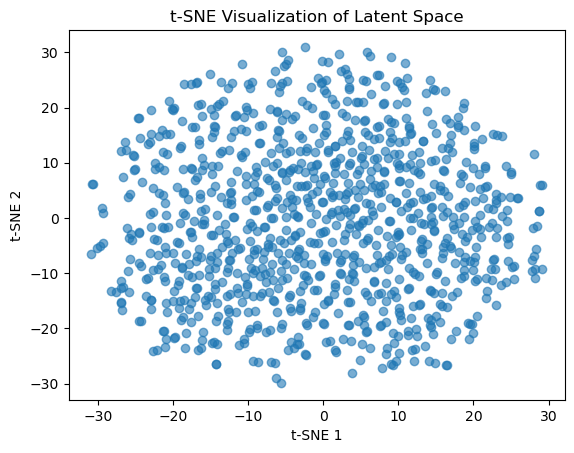

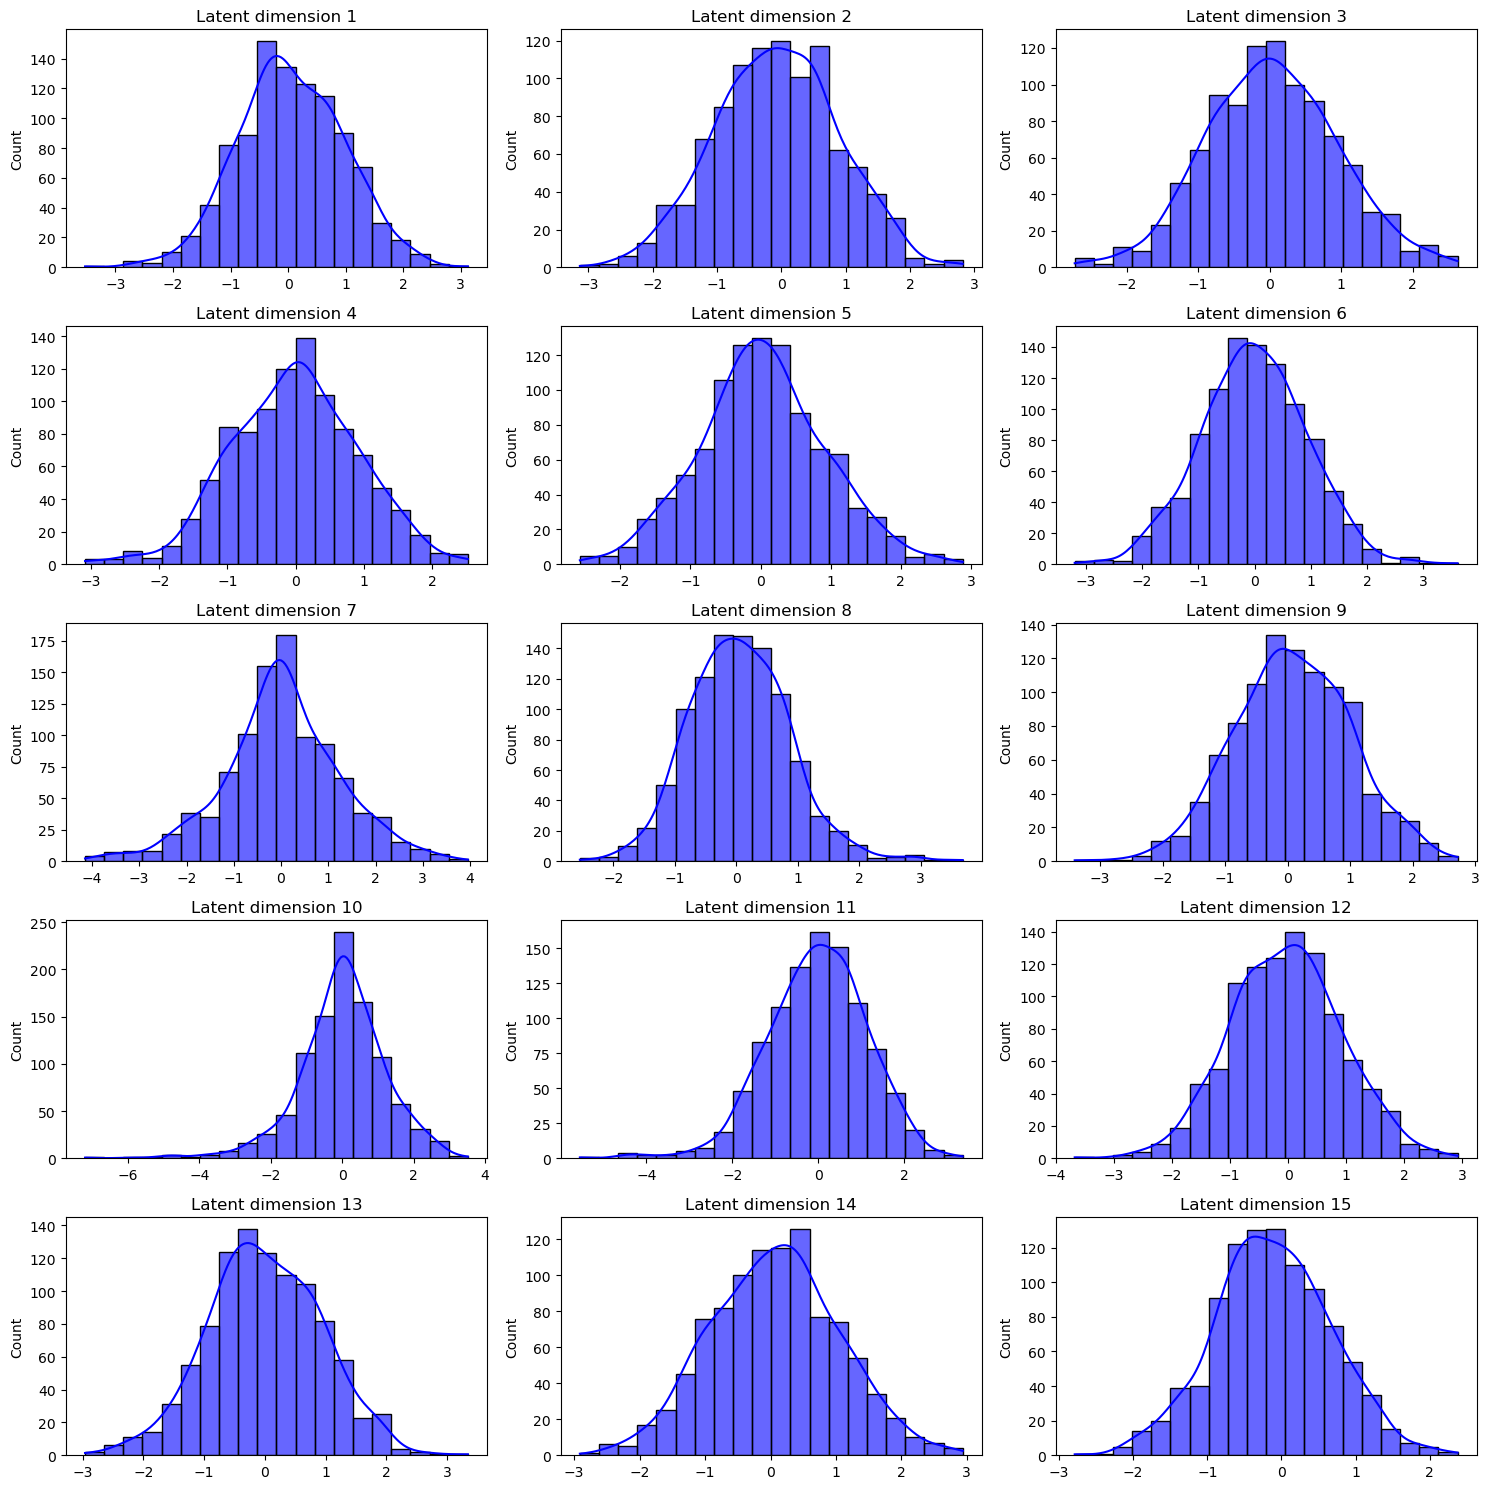

Visualization results for 20 dimensional latent space


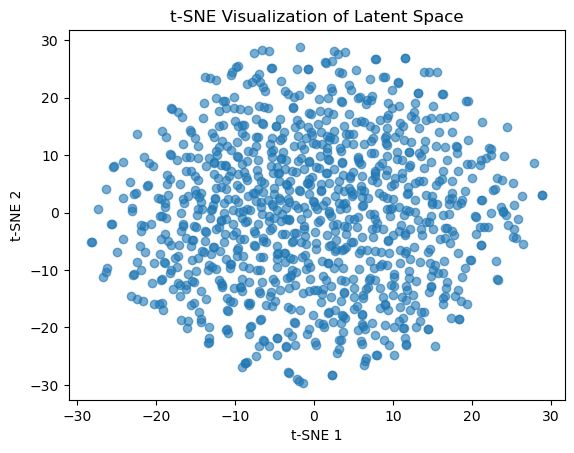

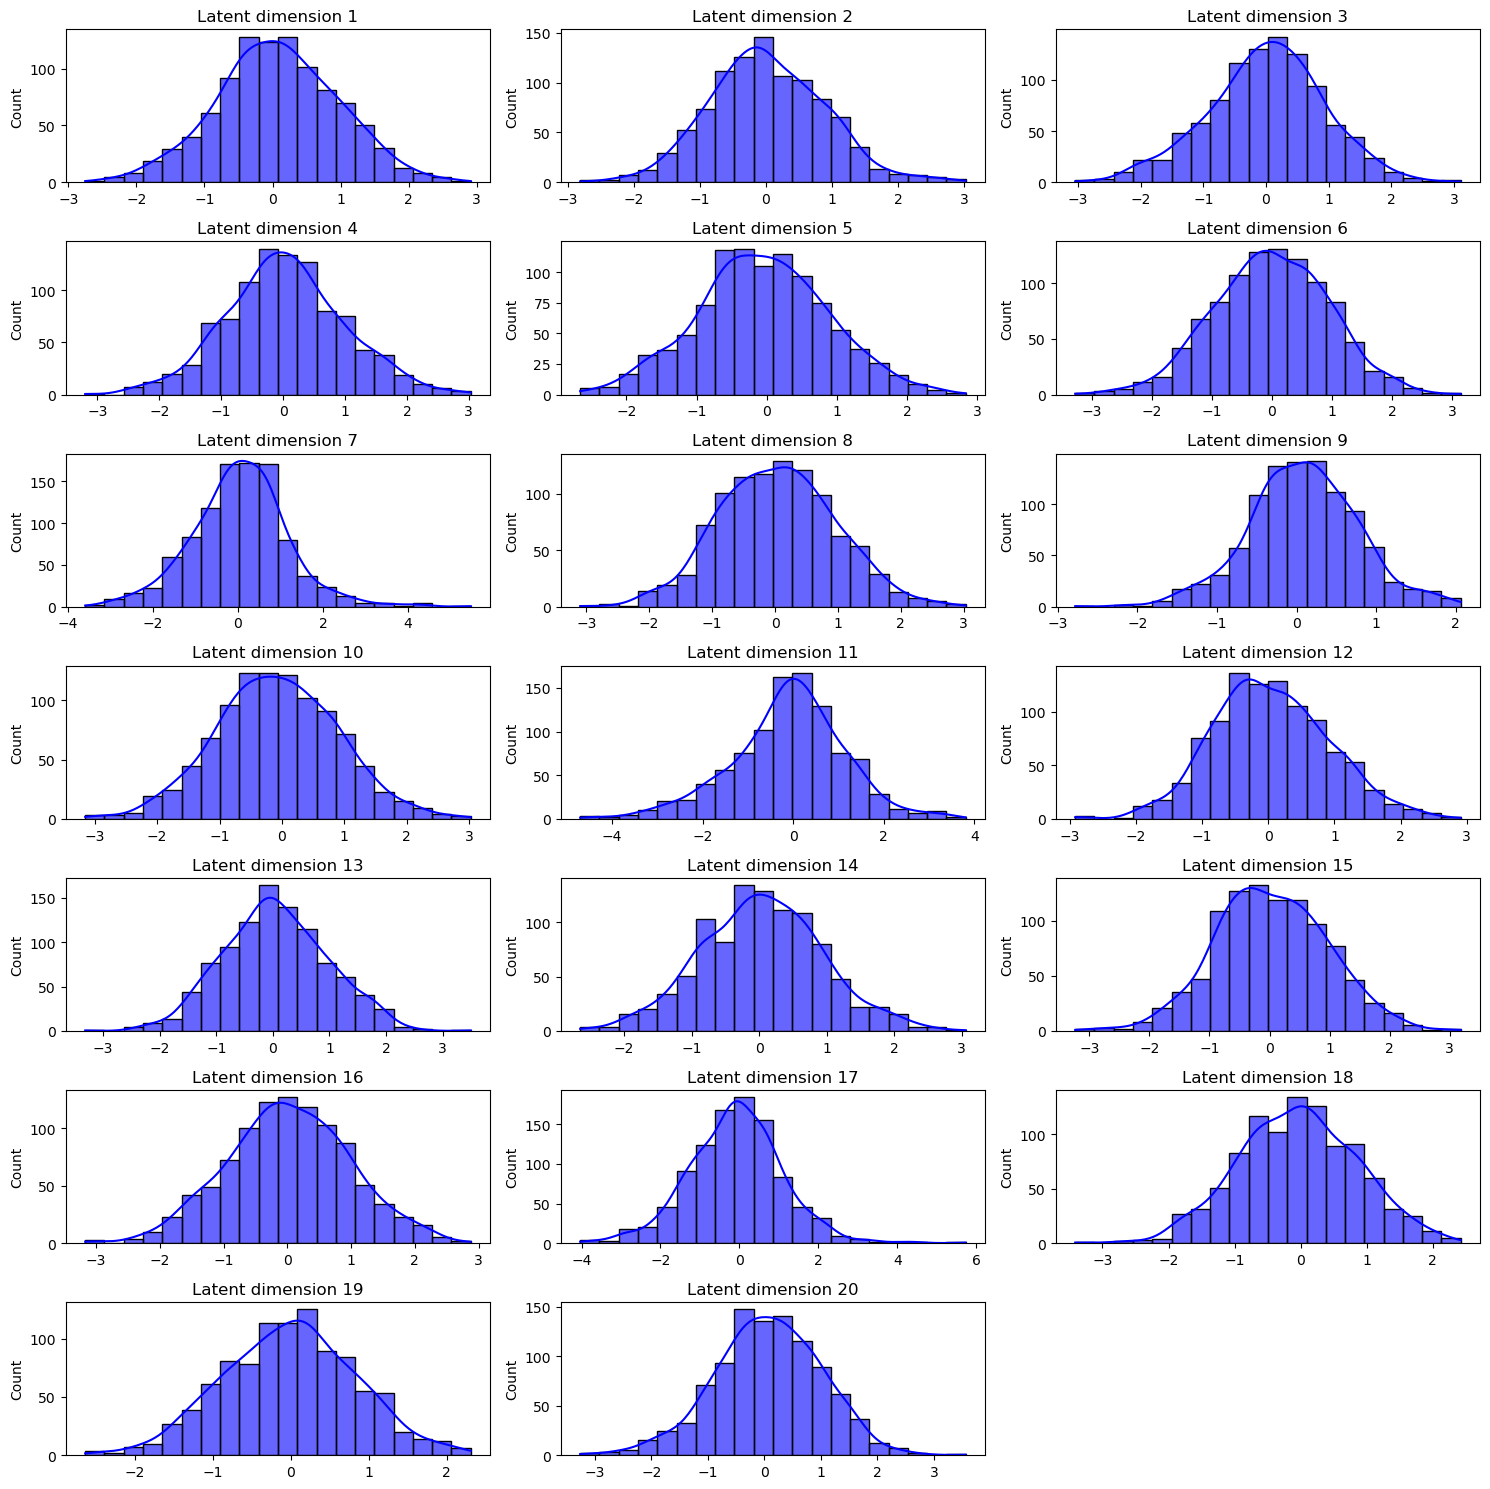

Visualization results for 25 dimensional latent space


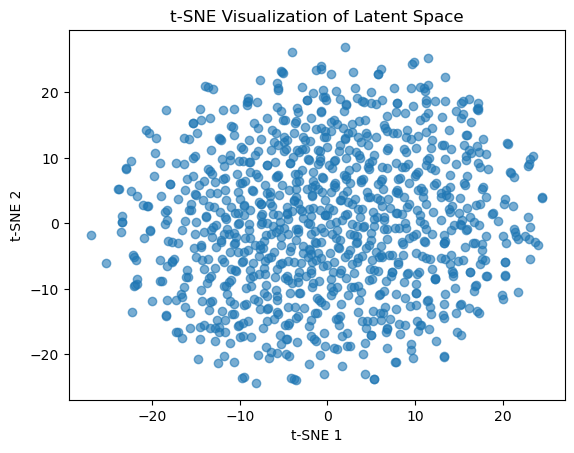

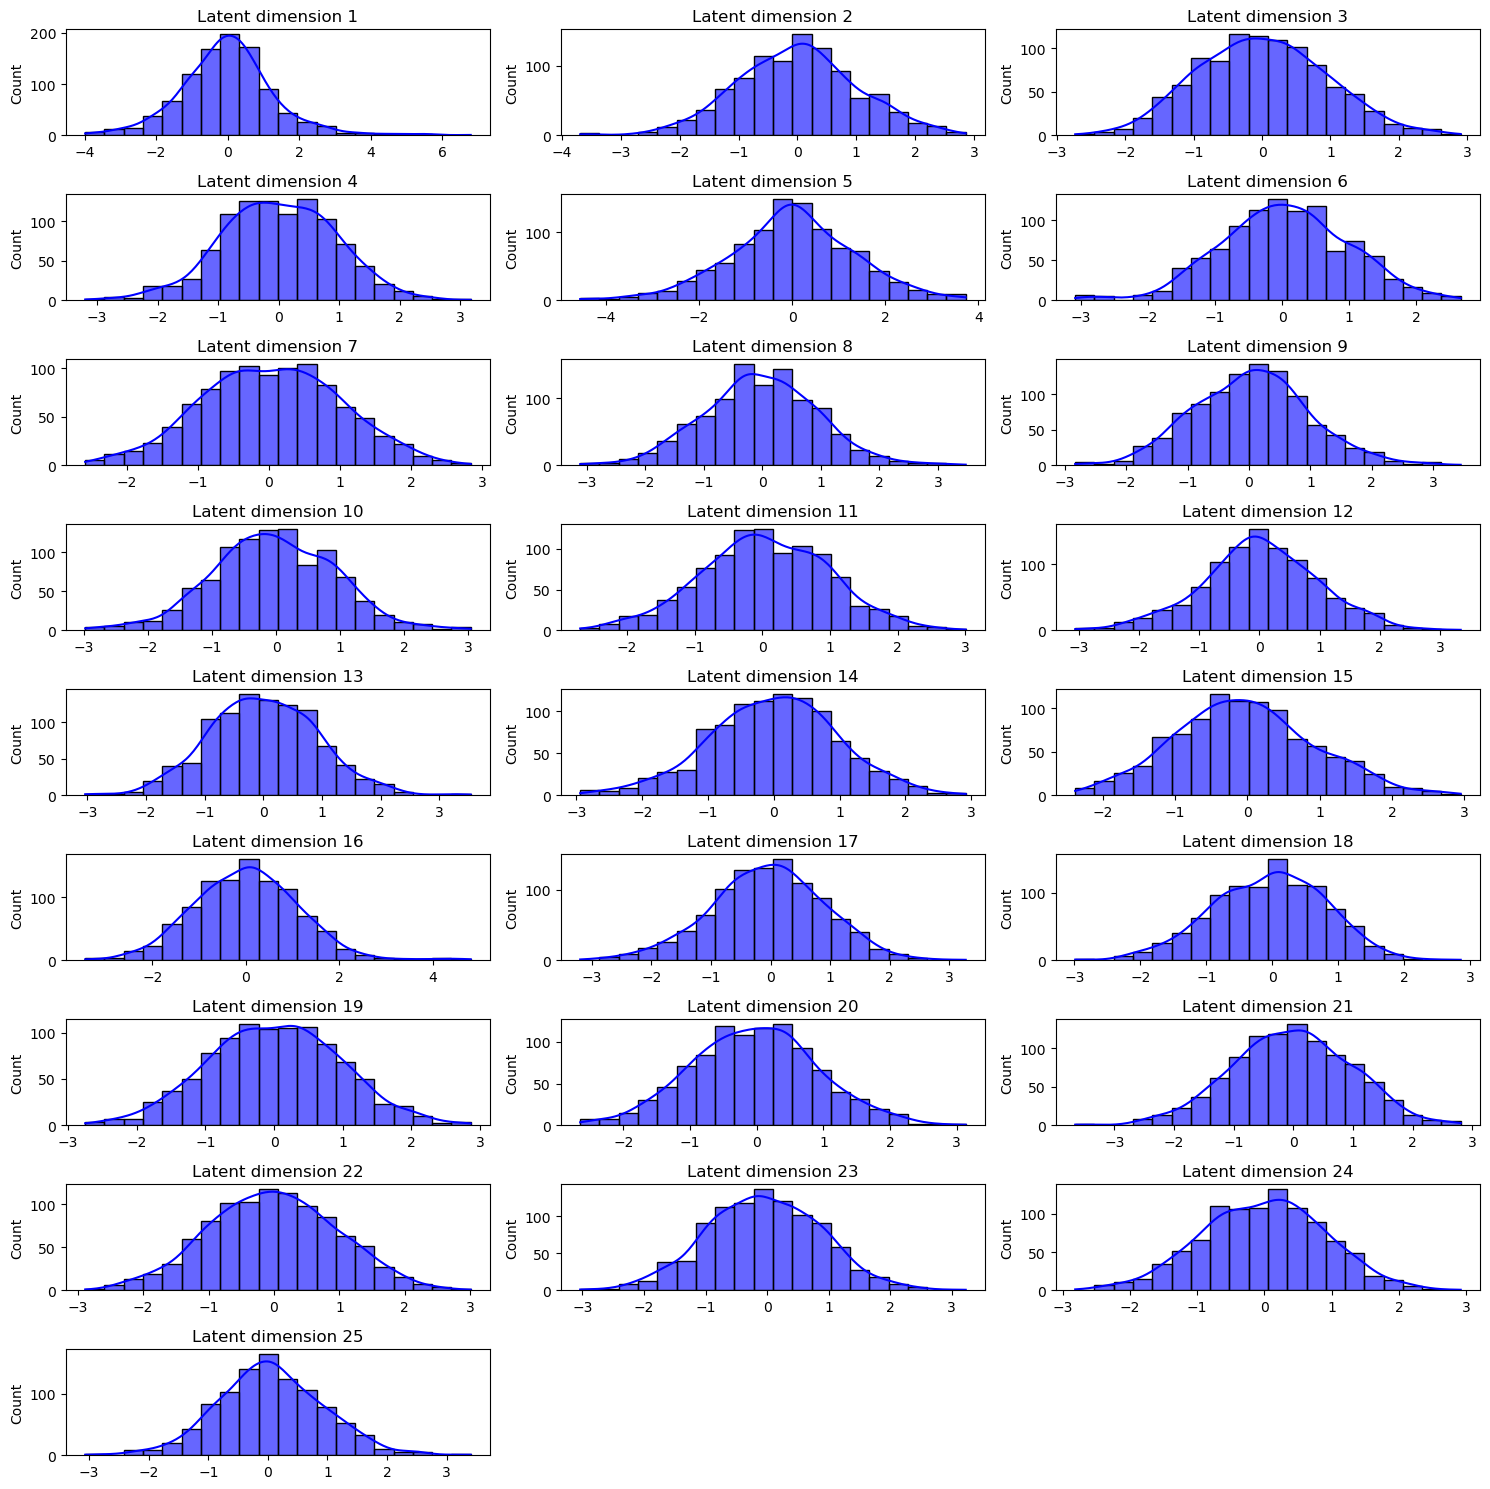

Visualization results for 30 dimensional latent space


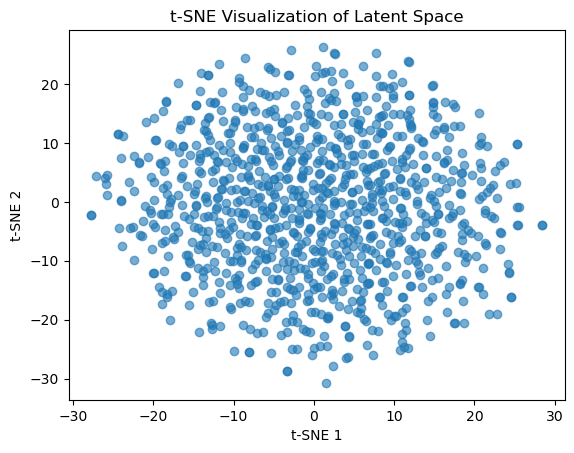

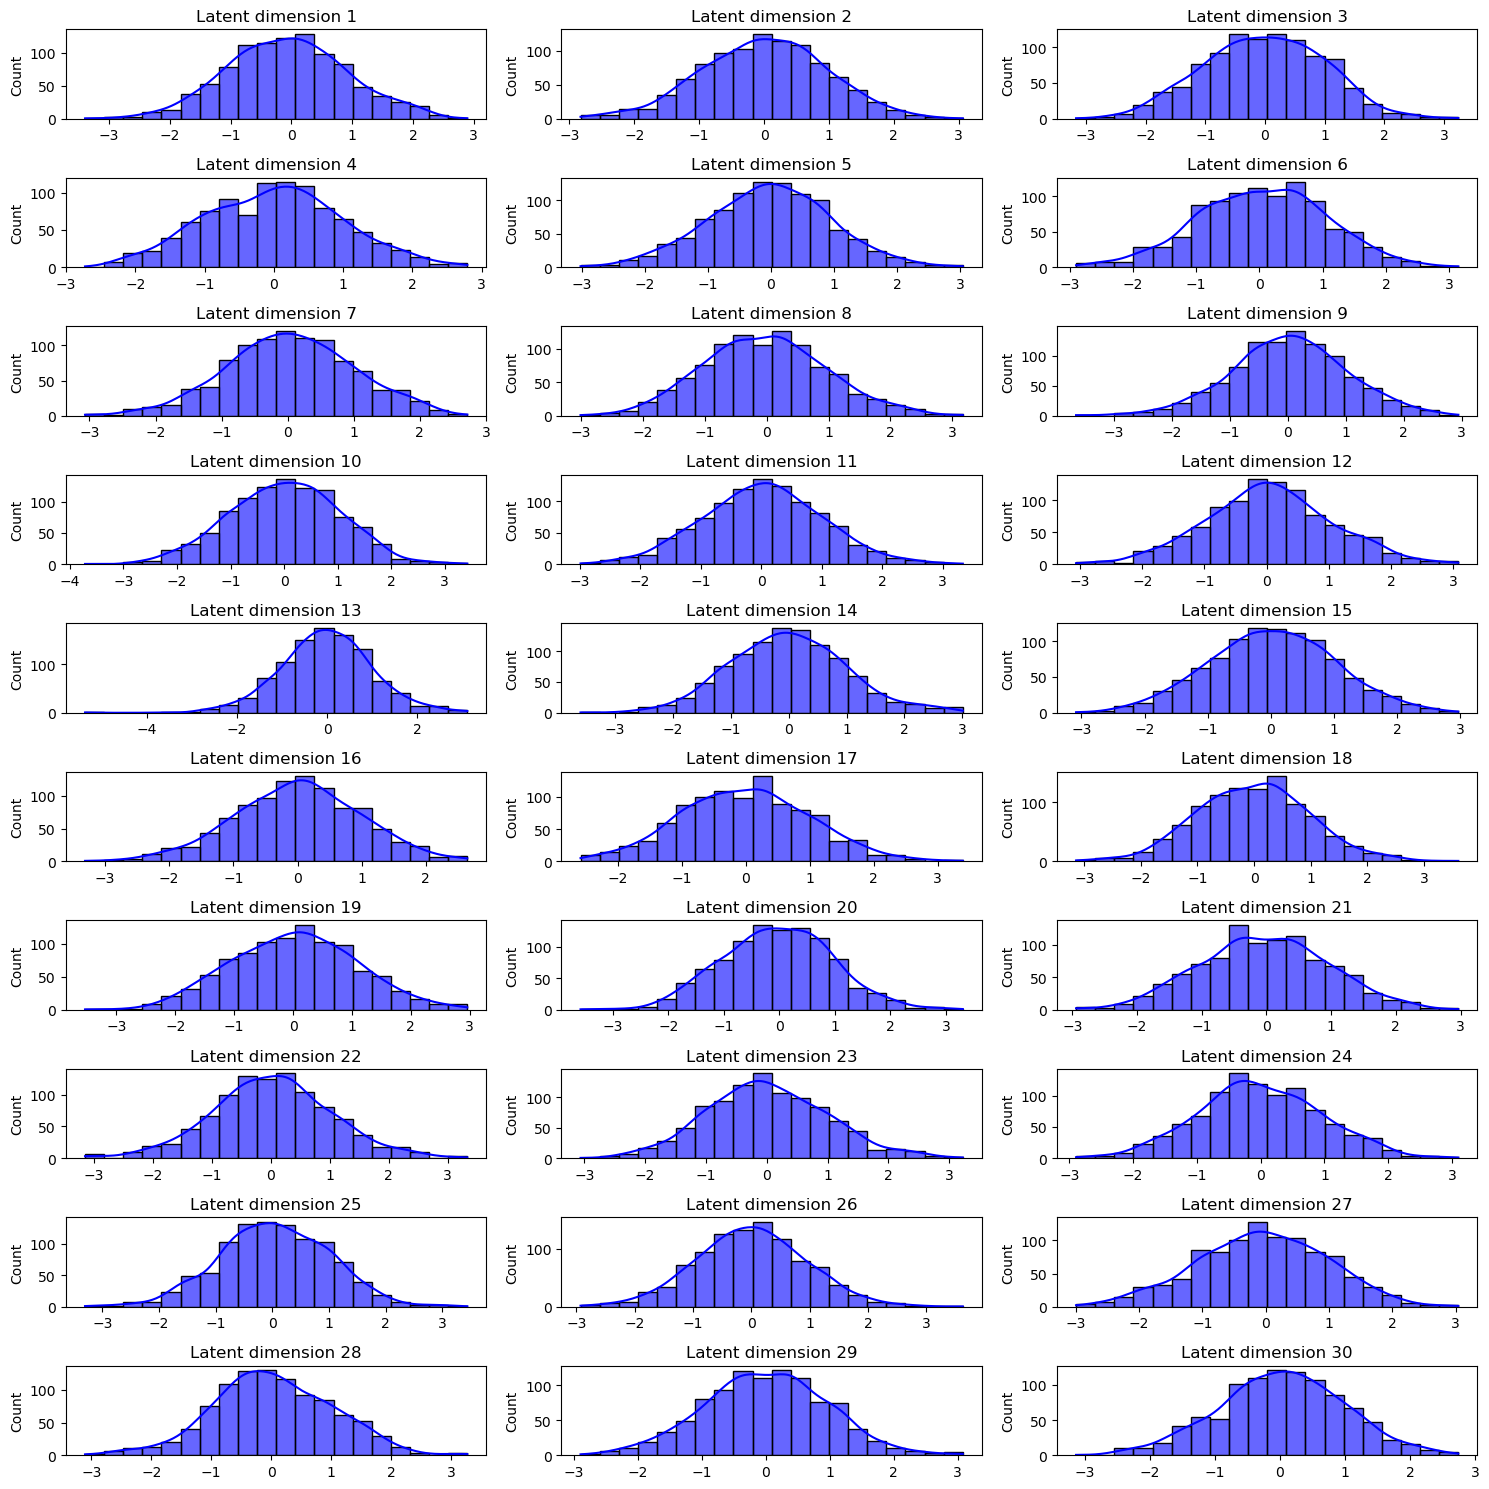

In [5]:
for i in range(len(best_models_total)):
    print(f"Visualization results for {labels[i]} dimensional latent space")
    print("=====================================================")
    params, res = best_models_total[i]
    encoder = create_vae_encoder(input_dim=input_dim, **params['encoder'])
    decoder = create_vae_decoder(output_dim=input_dim, **params['decoder'])
    vae = VAE(encoder, decoder, **params['vae'])
    vae.compile()
    train_data_use = train_data.batch(128)
    vae.fit(train_data_use, epochs=200, verbose=0)

    if not os.path.exists(os.getcwd() + '/../outputs/Images/latent_space/total_loss/'):
        os.makedirs(os.getcwd() + '/../outputs/Images/latent_space/total_loss/')

    savefile = os.getcwd() + '/../outputs/Images/latent_space/total_loss/latent_vis_' + labels[i] + '.png'
    visualize_latent_space(vae, val_data, savefile)
    savefile = os.getcwd() + '/../outputs/Images/latent_space/total_loss/latent_dim_plots_' + labels[i] + '.png'
    plot_latent_dimensions(vae, val_data, params['encoder']['latent_dim'], savefile)

Visualization results for 15 dimensional latent space


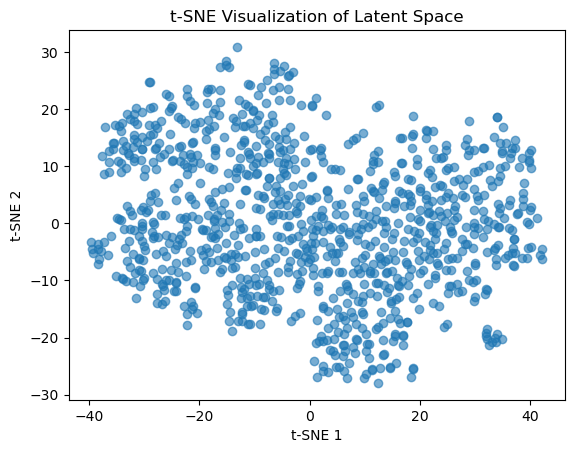

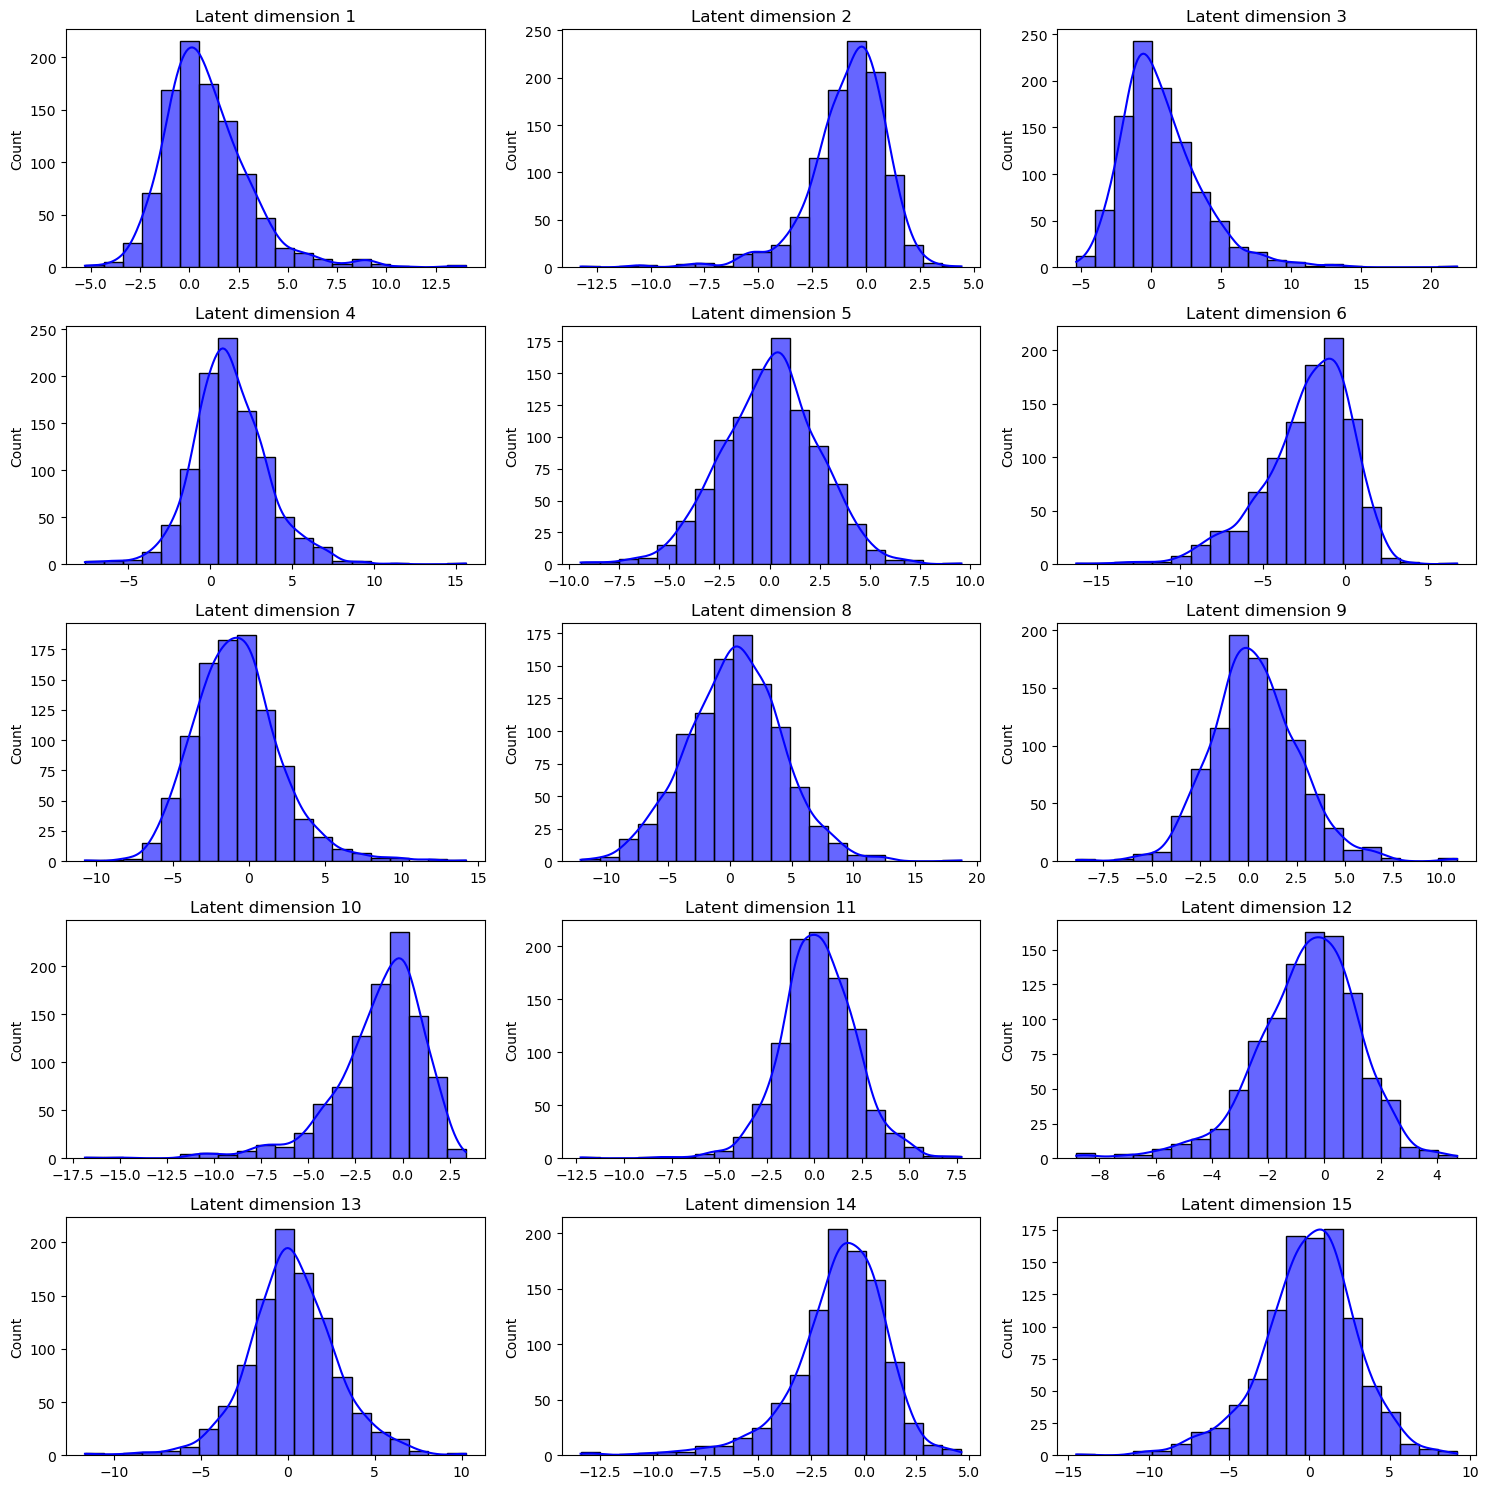

Visualization results for 20 dimensional latent space


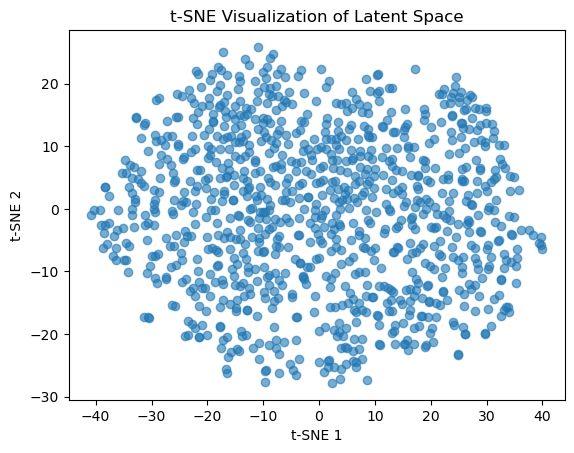

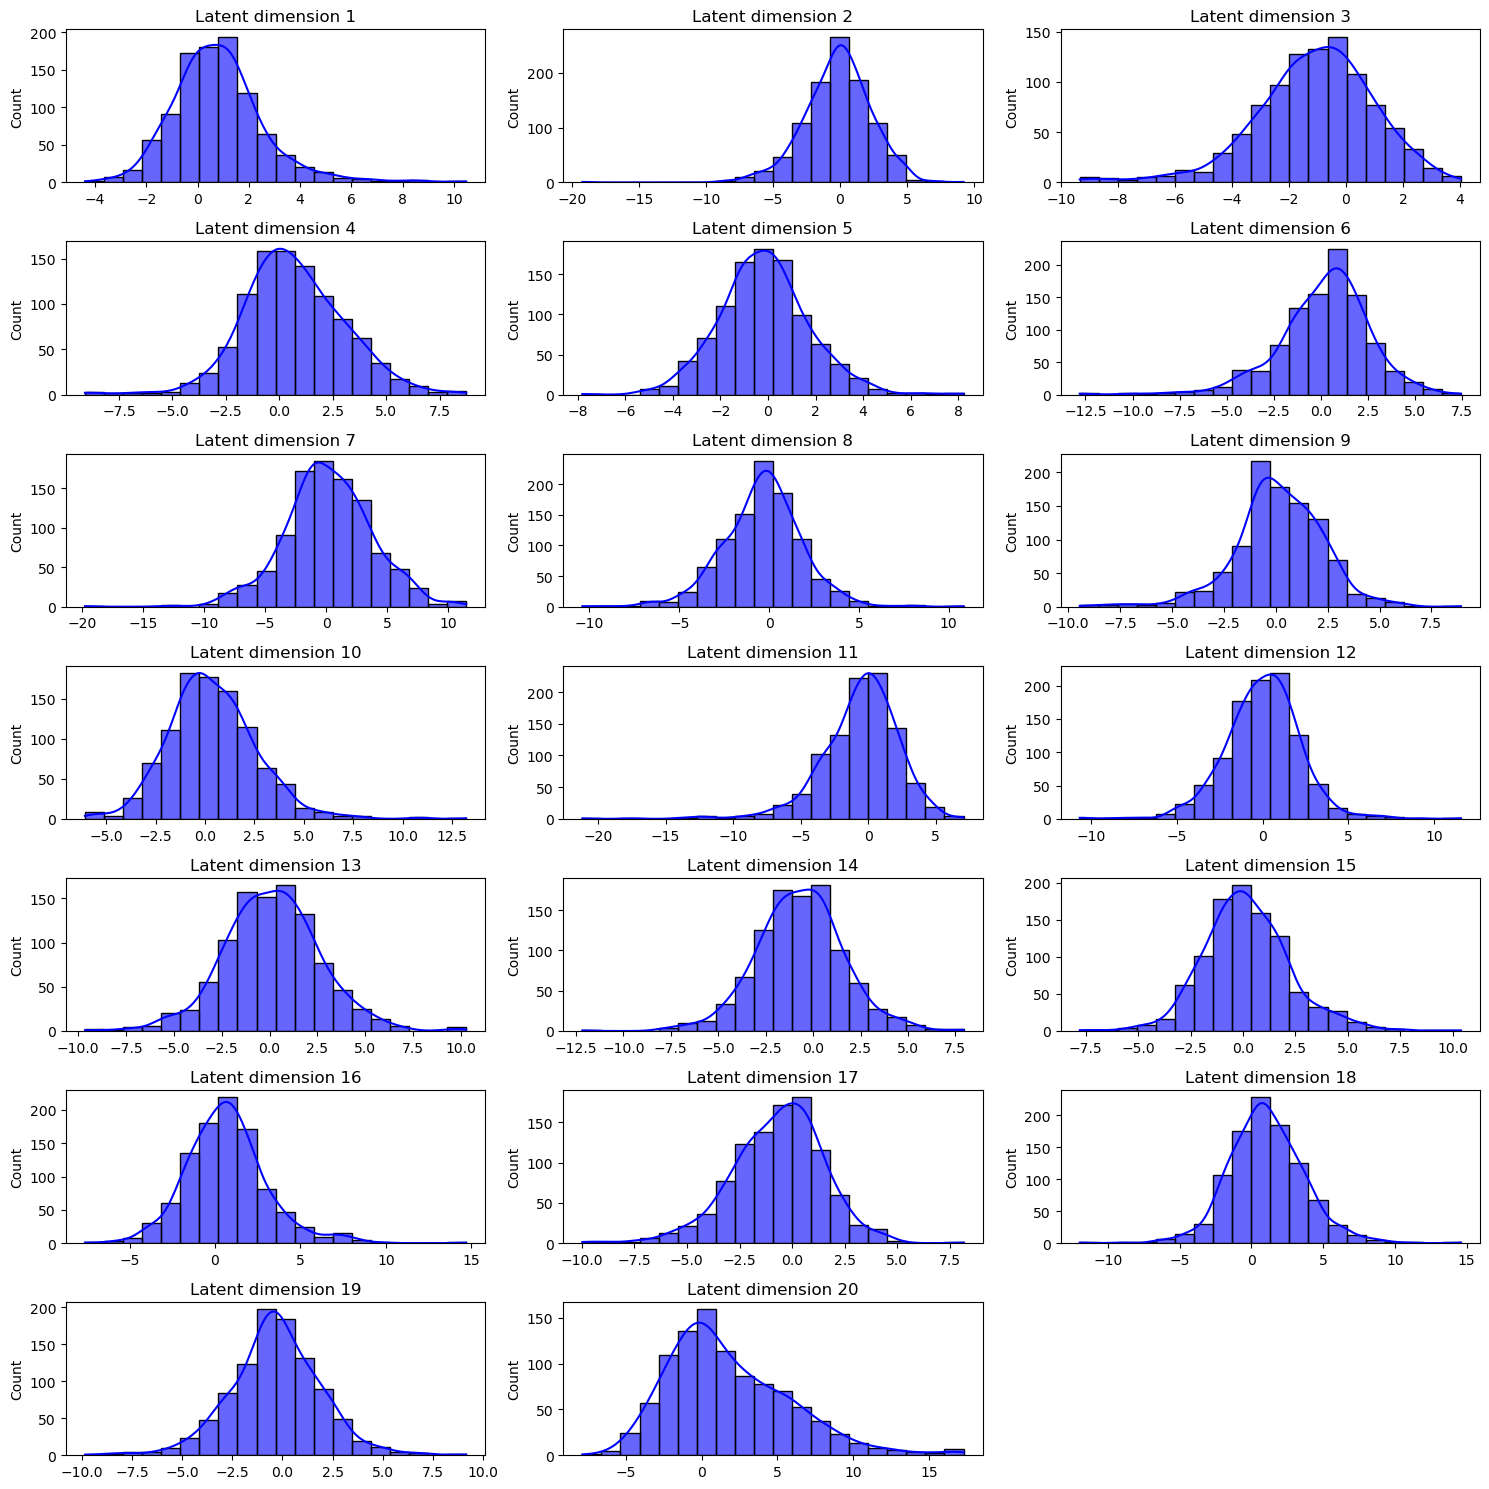

Visualization results for 25 dimensional latent space


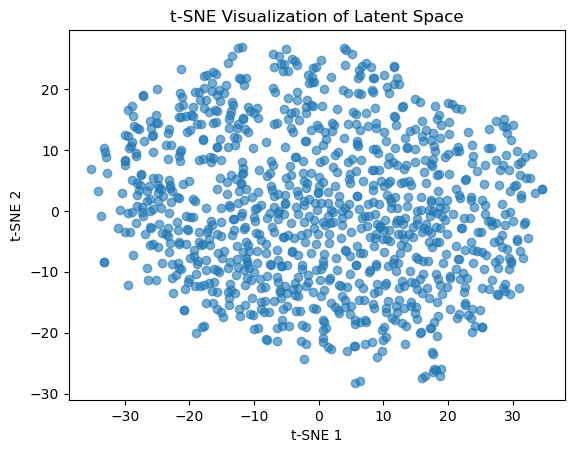

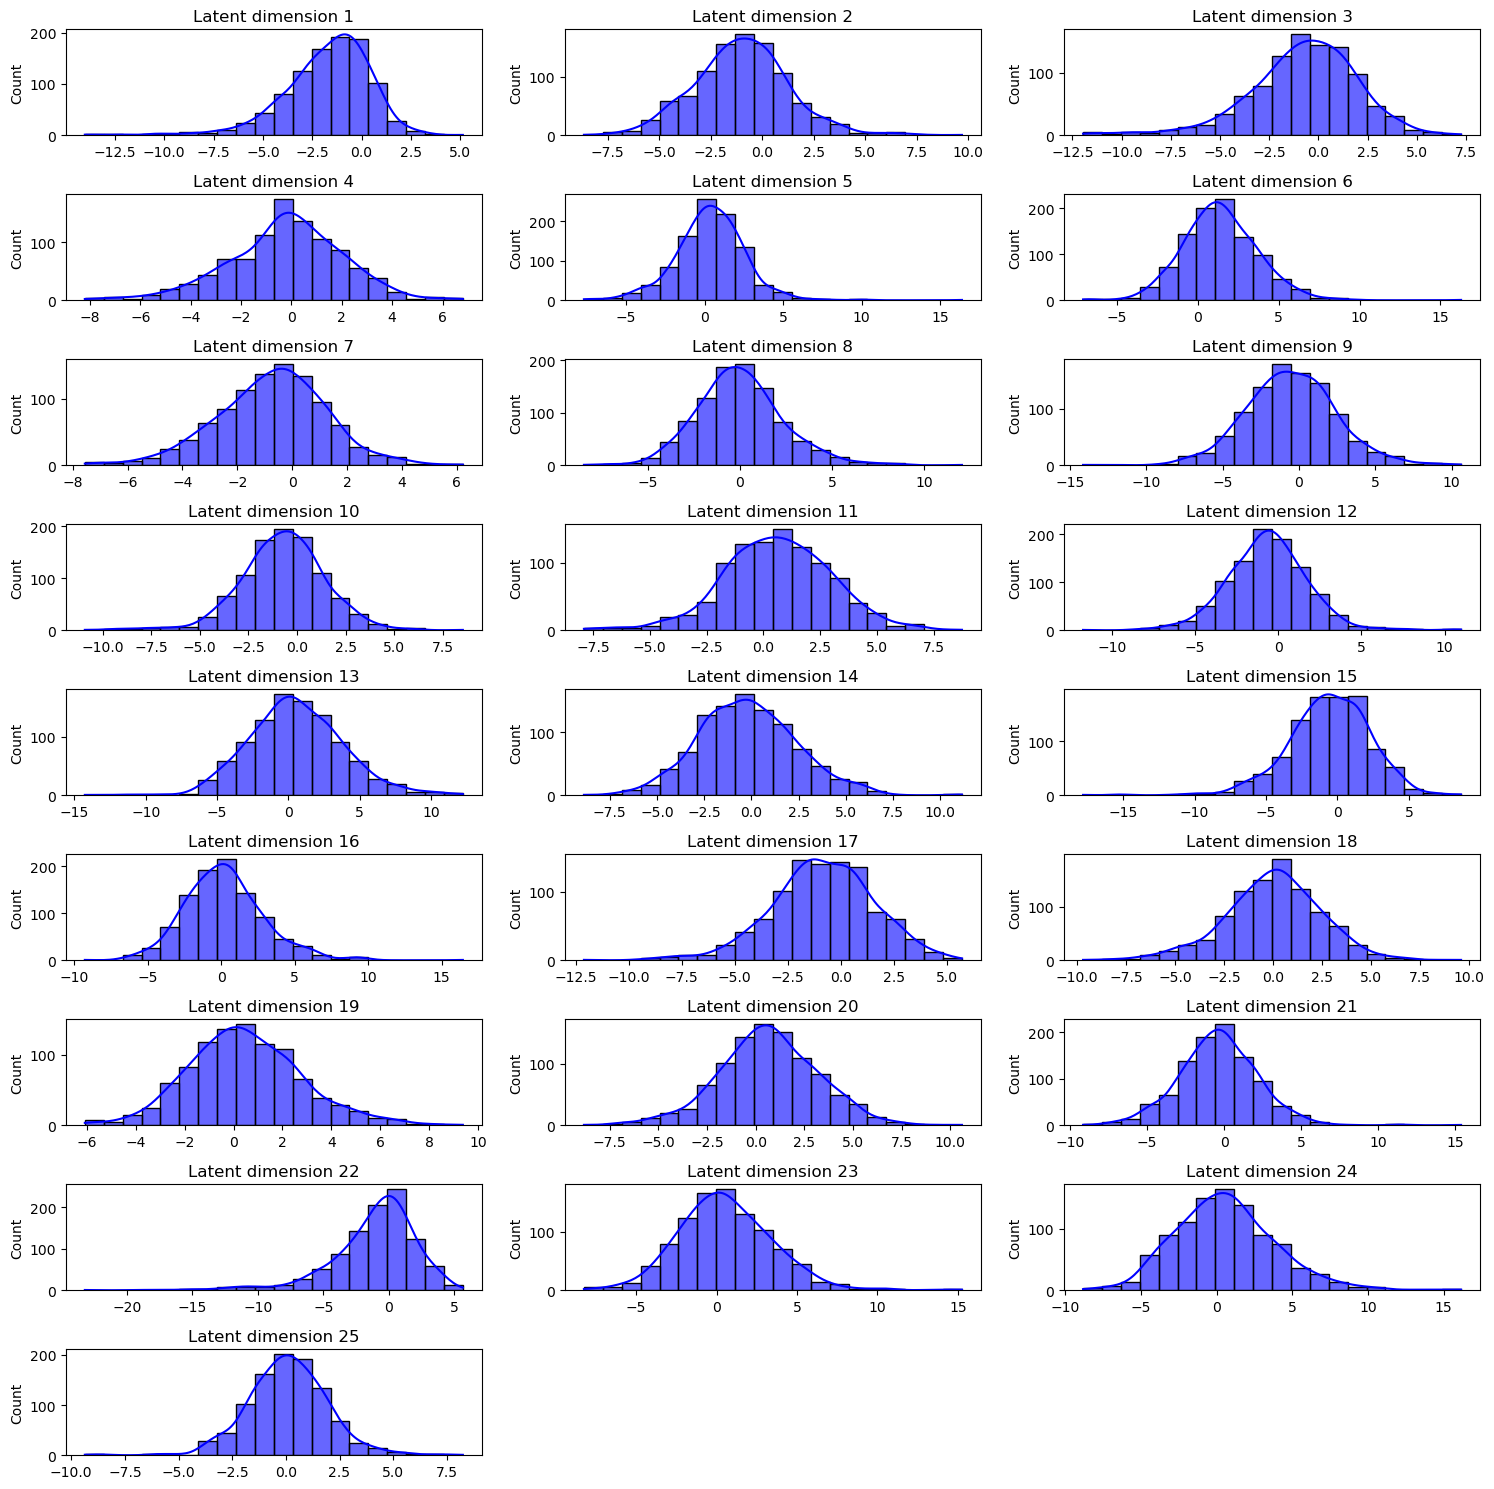

Visualization results for 30 dimensional latent space


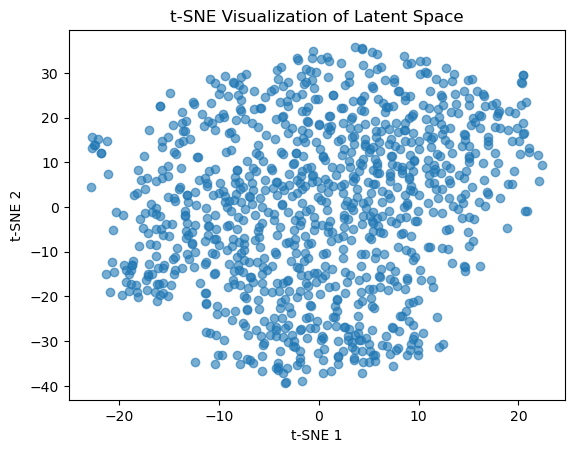

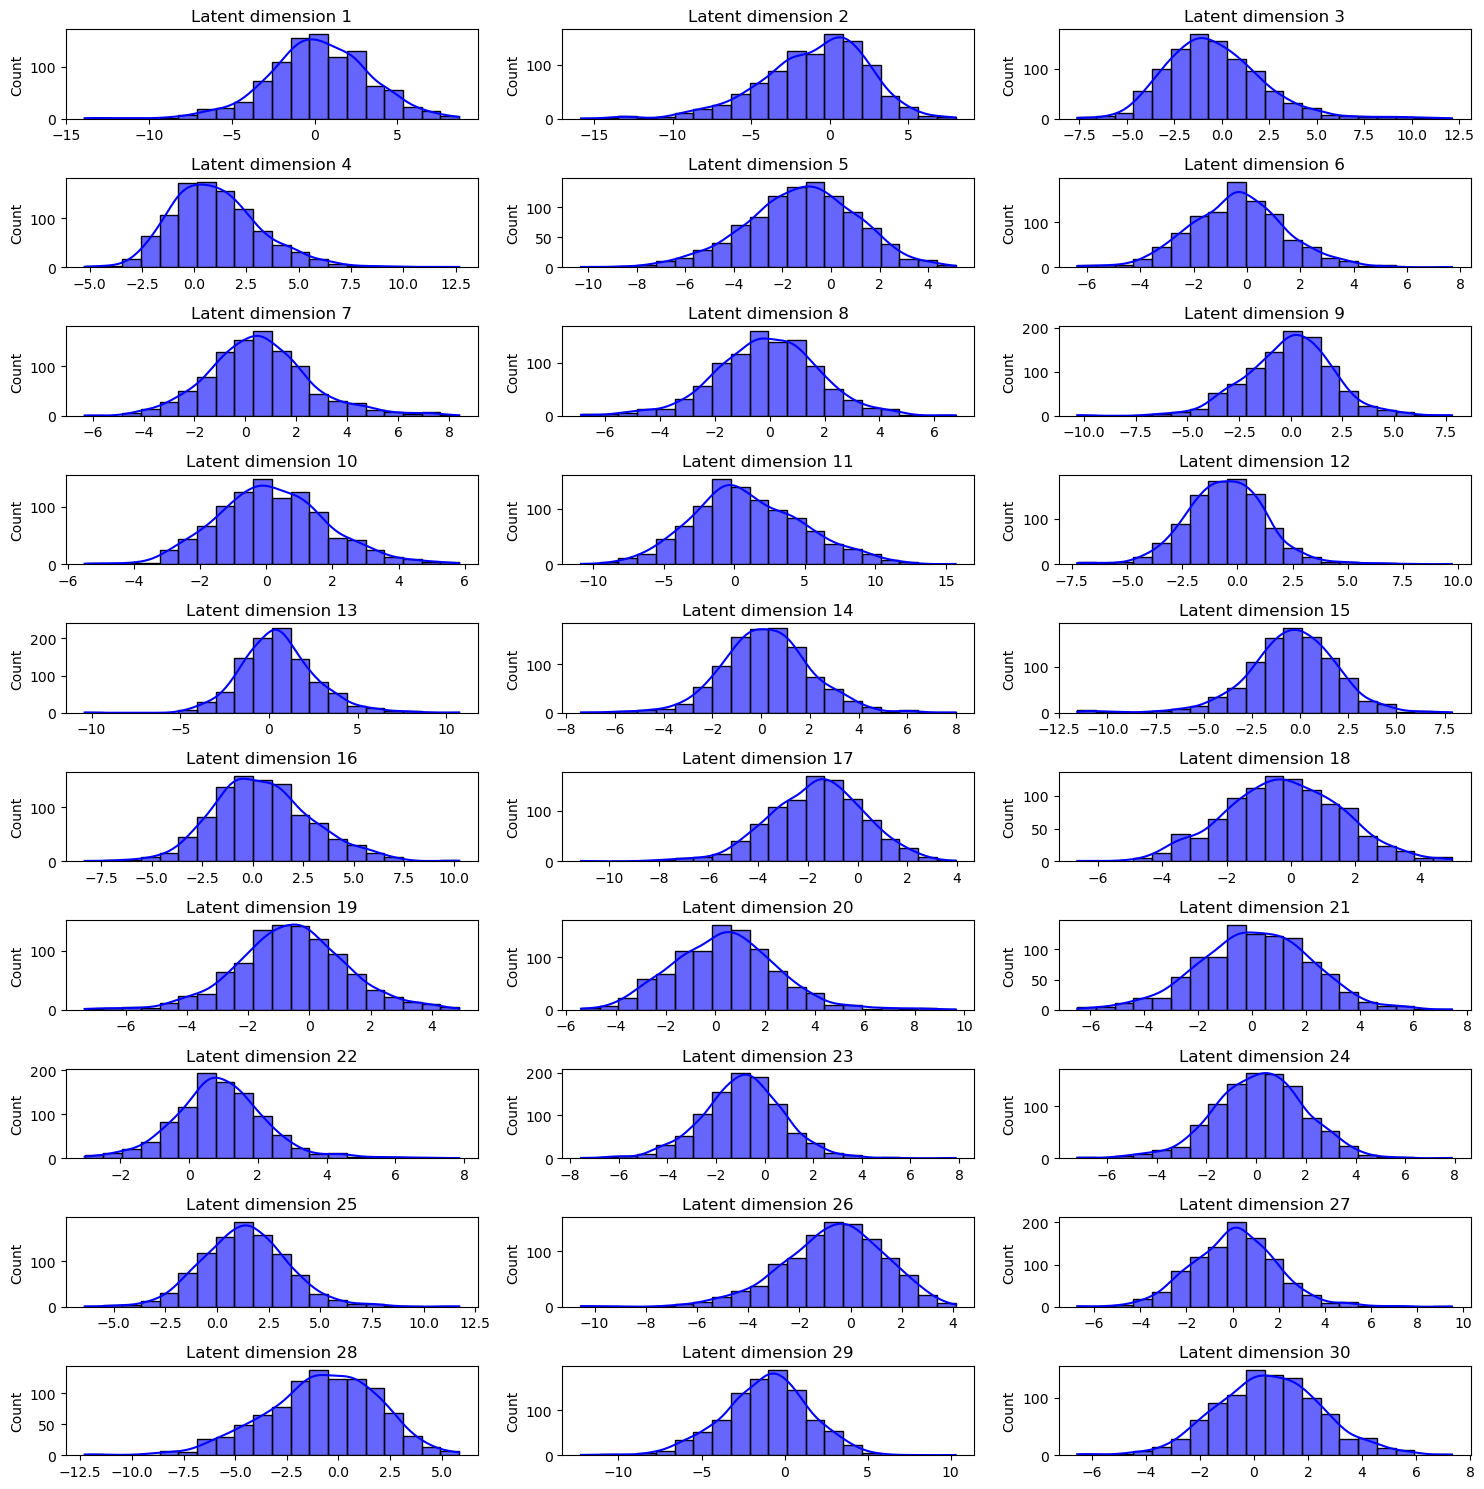

In [6]:
for i in range(len(best_models_recon)):
    print(f"Visualization results for {labels[i]} dimensional latent space")
    print("=====================================================")
    params, res = best_models_recon[i]
    encoder = create_vae_encoder(input_dim=input_dim, **params['encoder'])
    decoder = create_vae_decoder(output_dim=input_dim, **params['decoder'])
    vae = VAE(encoder, decoder, **params['vae'])
    vae.compile()
    train_data_use = train_data.batch(128)
    vae.fit(train_data_use, epochs=200, verbose=0)

    if not os.path.exists(os.getcwd() + '/../outputs/Images/latent_space/recon_loss/'):
        os.makedirs(os.getcwd() + '/../outputs/Images/latent_space/recon_loss/')

    savefile = os.getcwd() + '/../outputs/Images/latent_space/recon_loss/latent_vis_' + labels[i] + '.png'
    visualize_latent_space(vae, val_data, savefile)
    savefile = os.getcwd() + '/../outputs/Images/latent_space/recon_loss/latent_dim_plots_' + labels[i] + '.png'
    plot_latent_dimensions(vae, val_data, params['encoder']['latent_dim'], savefile)

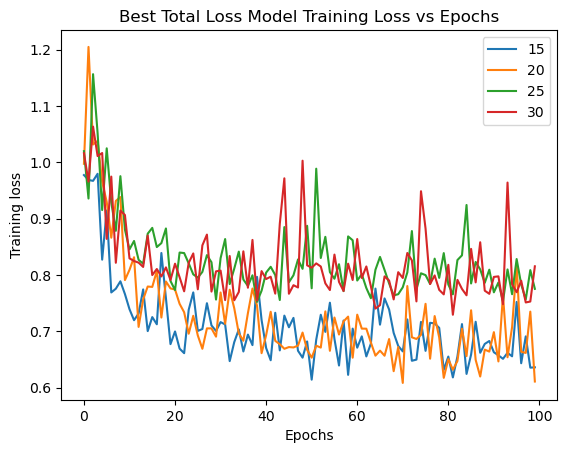

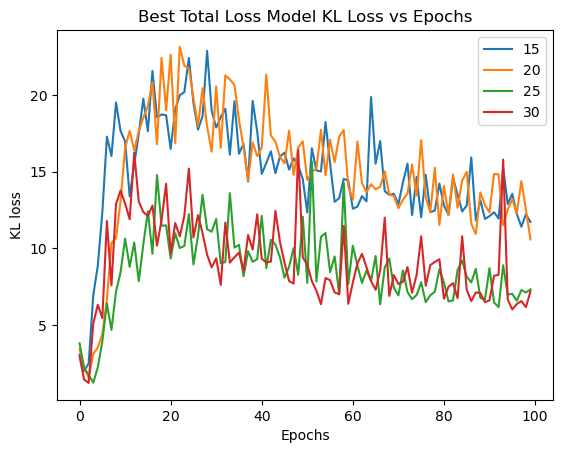

In [7]:
for i in range(len(best_models_total)):
    params, res = best_models_total[i]
    training_losses = res['avg_training_losses']
    kl_losses = res['avg_kl_losses']
    plt.figure(1)
    plt.plot(range(len(training_losses)), training_losses, label=labels[i])
    plt.title('Best Total Loss Model Training Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Training loss')
    plt.legend()

    plt.figure(2)
    plt.plot(range(len(kl_losses)), kl_losses, label=labels[i])
    plt.title('Best Total Loss Model KL Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('KL loss')
    plt.legend()

plt.figure(1)
plt.savefig(os.getcwd() + '/../outputs/Images/latent_space/total_loss/training_loss.png')
plt.figure(2)
plt.savefig(os.getcwd() + '/../outputs/Images/latent_space/total_loss/kl_loss.png')

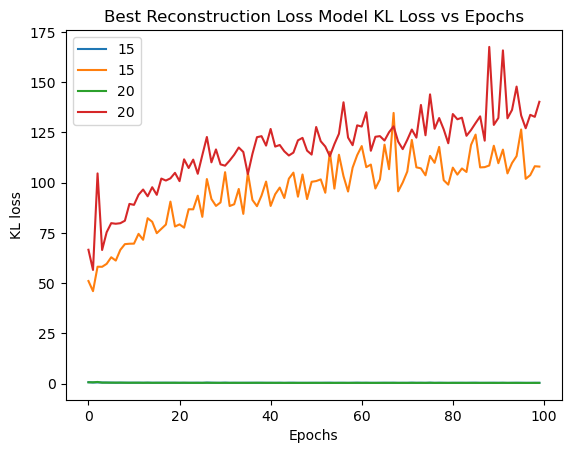

<Figure size 640x480 with 0 Axes>

In [8]:
for i in range(len(best_models_recon)):
    params, res = best_models_recon[i]
    training_losses = res['avg_training_losses']
    kl_losses = res['avg_kl_losses']

    plt.figure(1)
    plt.plot(range(len(training_losses)), training_losses, label=labels[i])
    plt.title('Best Reconstruction Loss Model Training Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Training loss')
    plt.legend()

    plt.figure(1)
    plt.plot(range(len(kl_losses)), kl_losses, label=labels[i])
    plt.title('Best Reconstruction Loss Model KL Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('KL loss')
    plt.legend()

plt.figure(1)
plt.savefig(os.getcwd() + '/../outputs/Images/latent_space/recon_loss/training_loss.png')
plt.figure(2)
plt.savefig(os.getcwd() + '/../outputs/Images/latent_space/recon_loss/kl_loss.png')

Visualization results for 15 dimensional latent space
Visualization results for 20 dimensional latent space
Visualization results for 25 dimensional latent space
Visualization results for 30 dimensional latent space


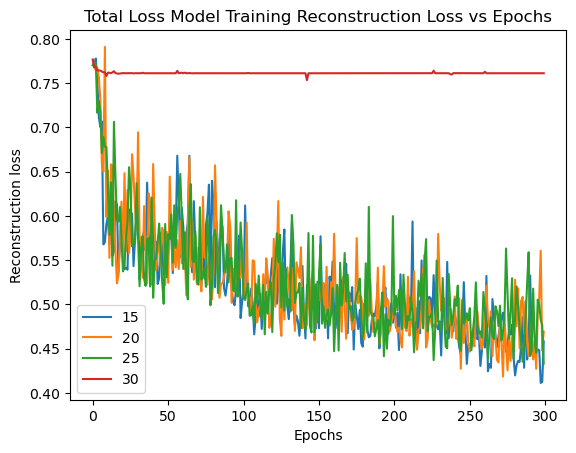

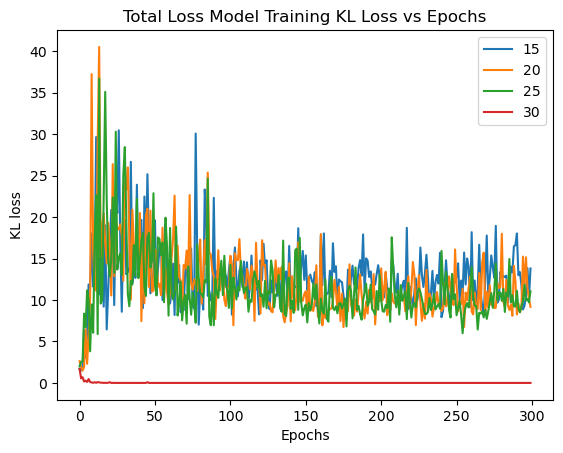

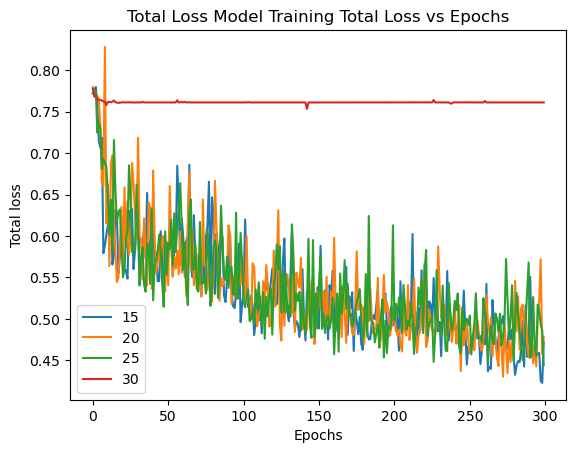

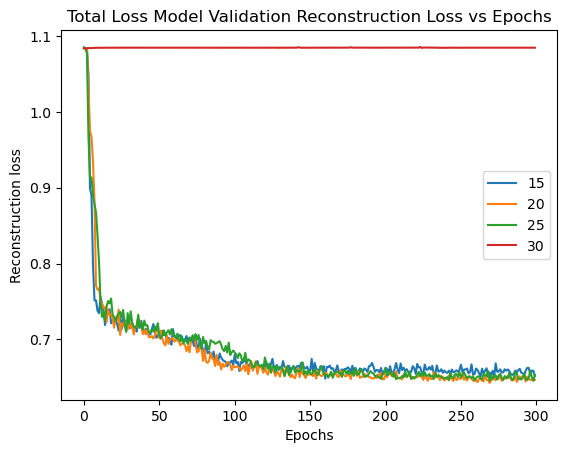

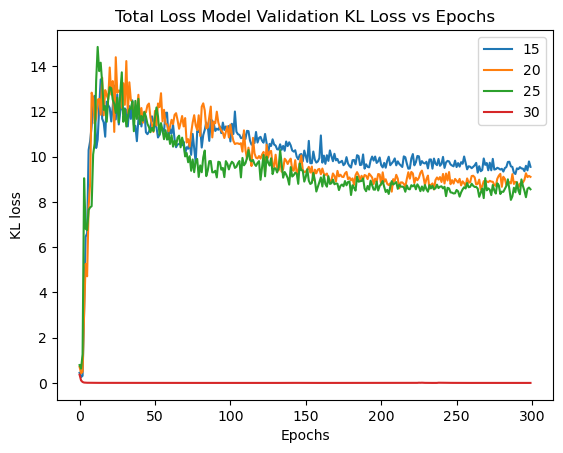

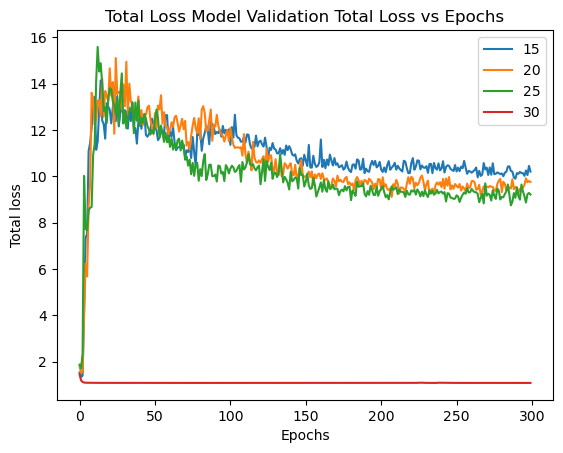

In [9]:
for i in range(len(best_models_total)):
    print(f"Visualization results for {labels[i]} dimensional latent space")
    params, res = best_models_total[i]
    encoder = create_vae_encoder(input_dim=input_dim, **params['encoder'])
    decoder = create_vae_decoder(output_dim=input_dim, **params['decoder'])
    vae = VAE(encoder, decoder, **params['vae'])
    vae.compile()
    batched_train_data = train_data.batch(128)
    batched_val_data = val_data.batch(128)
    vae, hist = train_val_vae(vae, batched_train_data, batched_val_data, epochs=300, verbose=0)
    recon_loss = hist.history['reconstruction_loss']
    kl_loss = hist.history['kl_loss']
    total_loss = hist.history['total_loss']
    val_recon_loss = hist.history['val_reconstruction_loss']
    val_kl_loss = hist.history['val_kl_loss']
    val_total_loss = hist.history['val_total_loss']
    epochs = hist.epoch

    plt.figure(1)
    plt.plot(epochs, recon_loss, label=labels[i])
    plt.title('Total Loss Model Training Reconstruction Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Reconstruction loss')
    plt.legend()

    plt.figure(2)
    plt.plot(epochs, kl_loss, label=labels[i])
    plt.title('Total Loss Model Training KL Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('KL loss')
    plt.legend()

    plt.figure(3)
    plt.plot(epochs, total_loss, label=labels[i])
    plt.title('Total Loss Model Training Total Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Total loss')
    plt.legend()

    plt.figure(4)
    plt.plot(epochs, val_recon_loss, label=labels[i])
    plt.title('Total Loss Model Validation Reconstruction Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Reconstruction loss')
    plt.legend()

    plt.figure(5)
    plt.plot(epochs, val_kl_loss, label=labels[i])
    plt.title('Total Loss Model Validation KL Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('KL loss')
    plt.legend()

    plt.figure(6)
    plt.plot(epochs, val_total_loss, label=labels[i])
    plt.title('Total Loss Model Validation Total Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Total loss')
    plt.legend()

plt.figure(1)
plt.savefig(os.getcwd() + '/../outputs/Images/latent_space/total_loss/training_recon_loss.png')
plt.figure(2)
plt.savefig(os.getcwd() + '/../outputs/Images/latent_space/total_loss/training_kl_loss.png')
plt.figure(3)
plt.savefig(os.getcwd() + '/../outputs/Images/latent_space/total_loss/training_total_loss.png')
plt.figure(4)
plt.savefig(os.getcwd() + '/../outputs/Images/latent_space/total_loss/validation_recon_loss.png')
plt.figure(5)
plt.savefig(os.getcwd() + '/../outputs/Images/latent_space/total_loss/validation_kl_loss.png')
plt.figure(6)
plt.savefig(os.getcwd() + '/../outputs/Images/latent_space/total_loss/validation_total_loss.png')

Visualization results for 15 dimensional latent space
Visualization results for 20 dimensional latent space
Visualization results for 25 dimensional latent space
Visualization results for 30 dimensional latent space


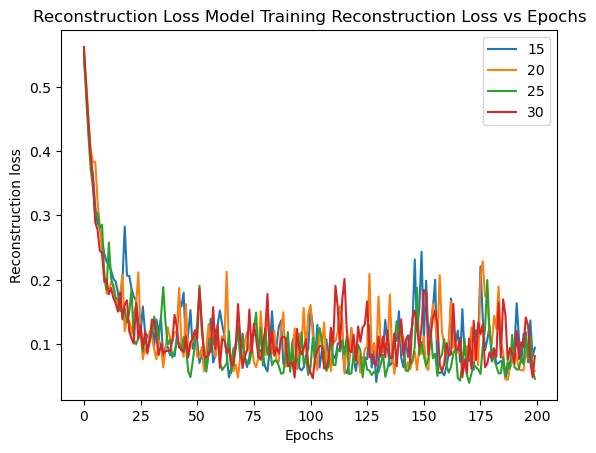

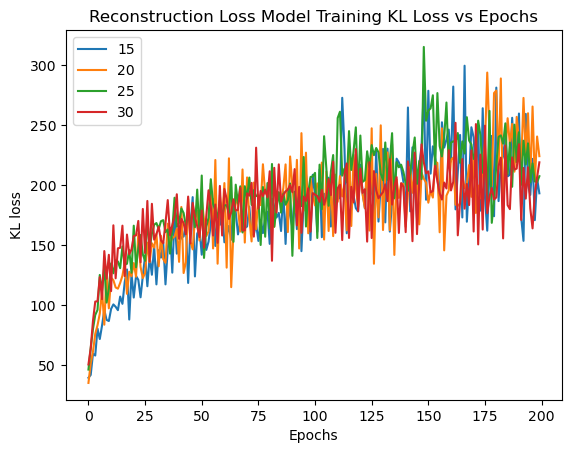

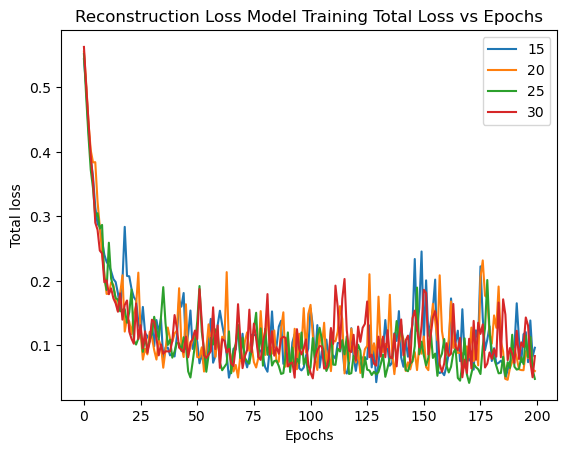

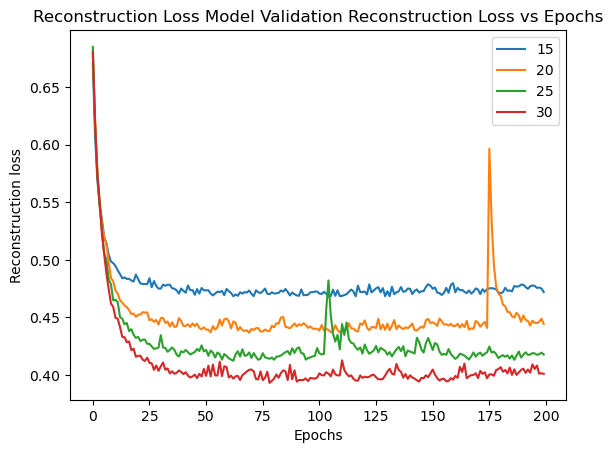

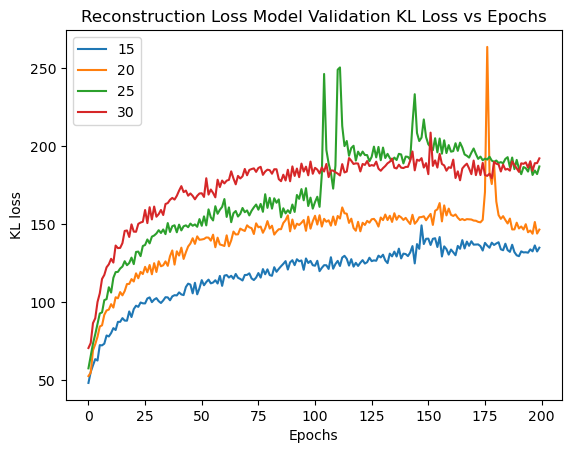

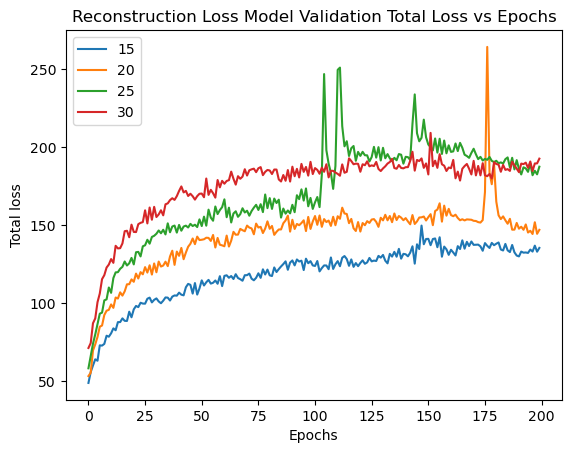

In [11]:
for i in range(len(best_models_recon)):
    print(f"Visualization results for {labels[i]} dimensional latent space")
    params, res = best_models_recon[i]
    encoder = create_vae_encoder(input_dim=input_dim, **params['encoder'])
    decoder = create_vae_decoder(output_dim=input_dim, **params['decoder'])
    vae = VAE(encoder, decoder, **params['vae'])
    vae.compile()
    batched_train_data = train_data.batch(128)
    batched_val_data = val_data.batch(128)
    vae, hist = train_val_vae(vae, batched_train_data, batched_val_data, epochs=200, verbose=0)
    recon_loss = hist.history['reconstruction_loss']
    kl_loss = hist.history['kl_loss']
    total_loss = hist.history['total_loss']
    val_recon_loss = hist.history['val_reconstruction_loss']
    val_kl_loss = hist.history['val_kl_loss']
    val_total_loss = hist.history['val_total_loss']
    epochs = hist.epoch

    plt.figure(7)
    plt.plot(epochs, recon_loss, label=labels[i])
    plt.title('Reconstruction Loss Model Training Reconstruction Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Reconstruction loss')
    plt.legend()

    plt.figure(8)
    plt.plot(epochs, kl_loss, label=labels[i])
    plt.title('Reconstruction Loss Model Training KL Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('KL loss')
    plt.legend()

    plt.figure(9)
    plt.plot(epochs, total_loss, label=labels[i])
    plt.title('Reconstruction Loss Model Training Total Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Total loss')
    plt.legend()

    plt.figure(10)
    plt.plot(epochs, val_recon_loss, label=labels[i])
    plt.title('Reconstruction Loss Model Validation Reconstruction Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Reconstruction loss')
    plt.legend()

    plt.figure(11)
    plt.plot(epochs, val_kl_loss, label=labels[i])
    plt.title('Reconstruction Loss Model Validation KL Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('KL loss')
    plt.legend()

    plt.figure(12)
    plt.plot(epochs, val_total_loss, label=labels[i])
    plt.title('Reconstruction Loss Model Validation Total Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Total loss')
    plt.legend()

plt.figure(7)
plt.savefig(os.getcwd() + '/../outputs/Images/latent_space/recon_loss/training_recon_loss.png')
plt.figure(8)
plt.savefig(os.getcwd() + '/../outputs/Images/latent_space/recon_loss/training_kl_loss.png')
plt.figure(9)
plt.savefig(os.getcwd() + '/../outputs/Images/latent_space/recon_loss/training_total_loss.png')
plt.figure(10)
plt.savefig(os.getcwd() + '/../outputs/Images/latent_space/recon_loss/validation_recon_loss.png')
plt.figure(11)
plt.savefig(os.getcwd() + '/../outputs/Images/latent_space/recon_loss/validation_kl_loss.png')
plt.figure(12)
plt.savefig(os.getcwd() + '/../outputs/Images/latent_space/recon_loss/validation_total_loss.png')